In [332]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [333]:
img = cv2.imread('runway.jpg', cv2.IMREAD_COLOR)

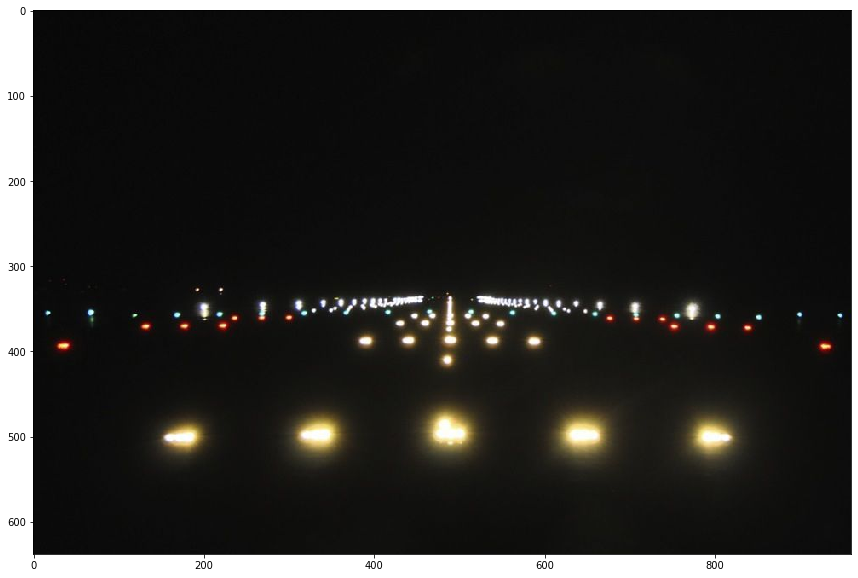

In [334]:
#Show the image with matplotlib
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

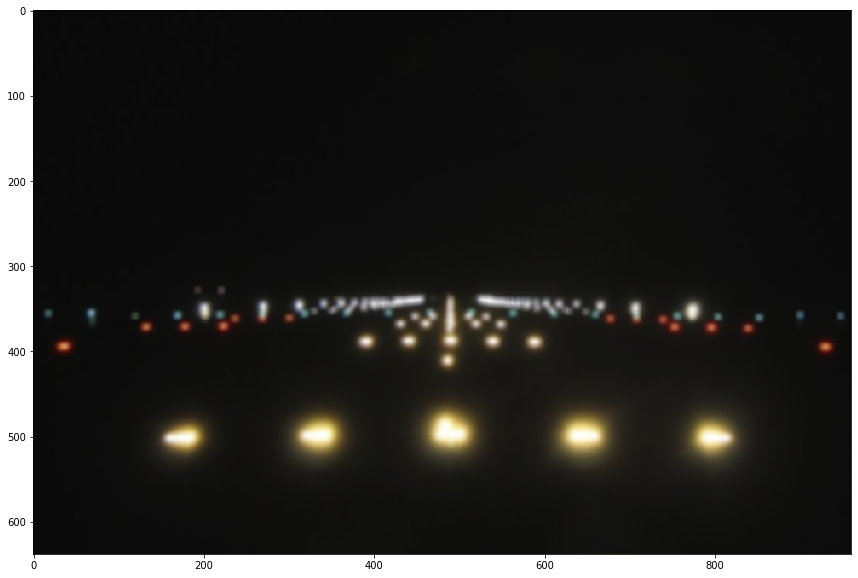

In [335]:
blur = cv2.blur(img,(8,8))
##blur = blur[390:638, 0:960]

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

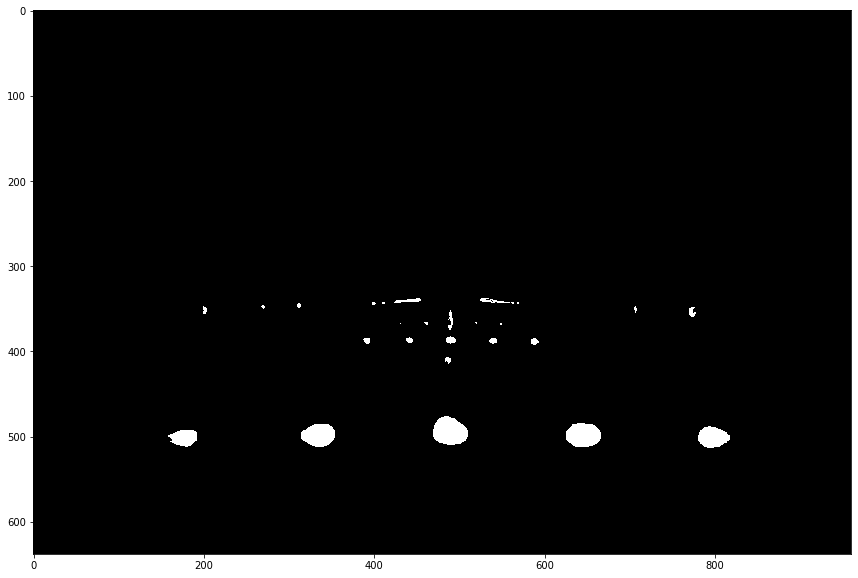

In [348]:
## hsv filter
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

lights = cv2.inRange(hsv, (15,0,200), (180,255,255))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(lights, cv2.COLOR_GRAY2BGR))
plt.show()

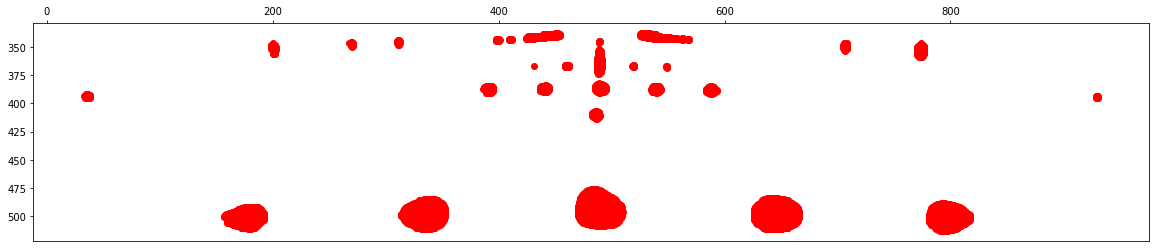

In [337]:
##plot pixel locations
plt.figure(figsize=(20,4))
data = np.array(list(indices))
xs = data.transpose()[0]   # or xs = data.T[0] or  xs = data[:,0]
ys = data.transpose()[1]
plt.plot(np.array(list(indices[1])), np.array(list(indices[0])), 'ro')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      

plt.show()

Estimated number of clusters: 13
Estimated number of noise points: 382


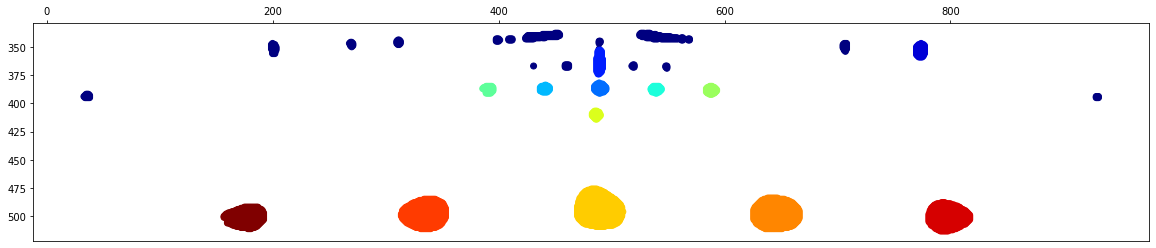

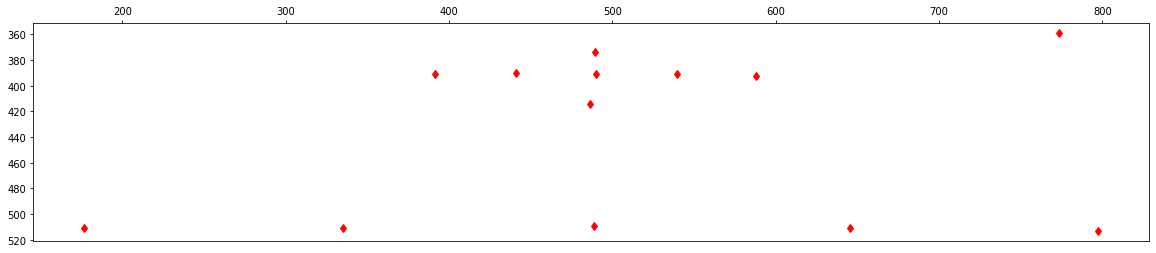

In [338]:
## Cluster light hypothesis by using DBSCAN
light_pixels = np.array(list(indices[:])).T
db = DBSCAN(eps=5, min_samples=40).fit(light_pixels)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.figure(figsize=(20,4))
data = np.array(list(indices))
xs = np.array(list(indices[1]))
ys = np.array(list(indices[0]))
plt.scatter(xs, ys, c=labels, cmap='jet')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      

plt.show()




## Calculate single location per cluster buttom middle of each cluster as homography input
light_locations =  np.zeros([0, 2])

for cluster_id in range(np.max(labels)+1):
    light_locations = np.vstack((light_locations, np.array([np.mean(xs[labels == [cluster_id]]), np.max(ys[labels == [cluster_id]])])))

plt.figure(figsize=(20,4))
plt.plot(light_locations[:,0], light_locations[:,1], 'rd')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      

plt.show()

In [339]:
np.set_printoptions(threshold=100)
print(light_locations)

[[773.53488372 359.        ]
 [489.37142857 374.        ]
 [489.81578947 391.        ]
 [440.93877551 390.        ]
 [539.43137255 391.        ]
 [391.23529412 391.        ]
 [588.17241379 392.        ]
 [486.38636364 414.        ]
 [488.71886792 509.        ]
 [645.60361318 511.        ]
 [334.83673469 511.        ]
 [797.57686883 513.        ]
 [176.38610039 511.        ]]


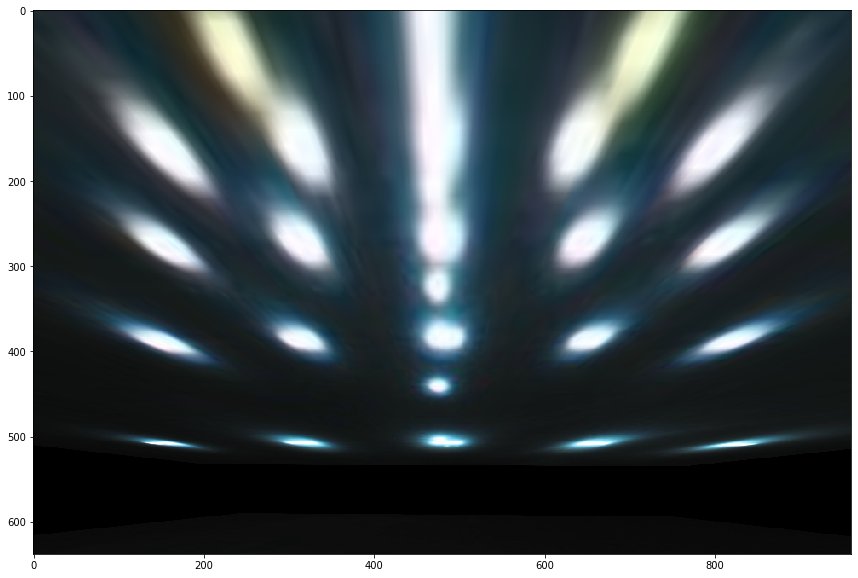

In [340]:
##Testing Perspective Transform
#TODO

# to calculate the transformation matrix
input_pts = np.float32([[176,511],[797,513],[391,391],[588,392]])
output_pts = np.float32([[176,511],[797,513],[176,400],[797,400]])

# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)

# Apply the perspective transformation to the image
out = cv2.warpPerspective(img,M,(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)

# Display the transformed image
plt.figure(figsize=(20,10))
plt.imshow(out)